In [1]:
import tensorflow as tf

w = tf.Variable(tf.constant(5, dtype=tf.float32))
lr = 0.2
epoch = 40

for epoch in range(epoch):  # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环40次迭代。
    with tf.GradientTape() as tape:  # with结构到grads框起了梯度的计算过程。
        loss = tf.square(w + 1)
    grads = tape.gradient(loss, w)  # .gradient函数告知谁对谁求导

    w.assign_sub(lr * grads)  # .assign_sub 对变量做自减 即：w -= lr*grads 即 w = w - lr*grads
    print("After %s epoch,w is %f,loss is %f" % (epoch, w.numpy(), loss))

# lr初始值：0.2   请自改学习率  0.001  0.999 看收敛过程
# 最终目的：找到 loss 最小 即 w = -1 的最优参数w


After 0 epoch,w is 2.600000,loss is 36.000000
After 1 epoch,w is 1.160000,loss is 12.959999
After 2 epoch,w is 0.296000,loss is 4.665599
After 3 epoch,w is -0.222400,loss is 1.679616
After 4 epoch,w is -0.533440,loss is 0.604662
After 5 epoch,w is -0.720064,loss is 0.217678
After 6 epoch,w is -0.832038,loss is 0.078364
After 7 epoch,w is -0.899223,loss is 0.028211
After 8 epoch,w is -0.939534,loss is 0.010156
After 9 epoch,w is -0.963720,loss is 0.003656
After 10 epoch,w is -0.978232,loss is 0.001316
After 11 epoch,w is -0.986939,loss is 0.000474
After 12 epoch,w is -0.992164,loss is 0.000171
After 13 epoch,w is -0.995298,loss is 0.000061
After 14 epoch,w is -0.997179,loss is 0.000022
After 15 epoch,w is -0.998307,loss is 0.000008
After 16 epoch,w is -0.998984,loss is 0.000003
After 17 epoch,w is -0.999391,loss is 0.000001
After 18 epoch,w is -0.999634,loss is 0.000000
After 19 epoch,w is -0.999781,loss is 0.000000
After 20 epoch,w is -0.999868,loss is 0.000000
After 21 epoch,w is -0.9

In [3]:
import tensorflow as tf
import numpy as np
x = np.arange(1,25).reshape(3,8)
# convert_to_tensor将numpy的数据类型转换为tensor数据类型
A = tf.convert_to_tensor(x, dtype=tf.int32)
# A = tf.constant([1.0,2.0], dtype=tf.float32)
print(A)
print(A.dtype)
print(A.shape)

tf.Tensor(
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]], shape=(3, 8), dtype=int32)
<dtype: 'int32'>
(3, 8)


In [11]:
# 创建全为0的张量
z = tf.zeros(2,3)
# 创建全为1的张量
n = tf.ones(2,3)
# 创建全为指定值的张量
t = tf.fill((2,3), 6)
# 生成正态分布的随机数 默认均值为0 标准差为1
z = tf.random.normal((2,3),0,1)
# 生成截断式正太分布的随机数
z = tf.random.truncated_normal((2,3), 0, 1)
# 均匀分布
z = tf.random.uniform([2,3], minval = -1, maxval = 1)
print(z)



tf.Tensor(
[[-0.54797935 -0.92712903  0.38553023]
 [-0.2936628  -0.59324336 -0.48738122]], shape=(2, 3), dtype=float32)


# 1 常用函数

In [19]:

# 强制将tensor转换为该数据类型
z = tf.cast(z, dtype=float)
print(z)
# 张量维度上元素最小的值与最大的值
print(tf.reduce_min(z))
print(tf.reduce_max(z))

# axis 
# 沿轴0进行求平均 轴0消失
print(tf.reduce_mean(z, axis = 0))
print(tf.reduce_sum(z, axis = 1))

tf.Tensor(
[[-0.54797935 -0.92712903  0.38553023]
 [-0.2936628  -0.59324336 -0.48738122]], shape=(2, 3), dtype=float32)
tf.Tensor(-0.92712903, shape=(), dtype=float32)
tf.Tensor(0.38553023, shape=(), dtype=float32)
tf.Tensor([-0.42082107 -0.7601862  -0.05092549], shape=(3,), dtype=float32)
tf.Tensor([-1.0895782 -1.3742874], shape=(2,), dtype=float32)


### tf.Variable函数
tf.Variable()将变量标记为可训练的，被标记的变量会在反向传播中记录梯度信息。
**神经网络训练中，常用该函数标记待训练的参数**

In [21]:
# w为可训练的权重
w = tf.Variable(tf.random.normal([2,2], mean=0, stddev=1))
w

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.74384177,  0.55364394],
       [-0.8462814 ,  0.5445934 ]], dtype=float32)>

### TensorFlow中的数学运算
+ 张量对应元素相加减 `tf.add`, `tf.subtract`, `tf.multiply`, `tf.divide` 
+ 平方/次方/开方 `tf.square, tf.pow, tf.sqrt`
+ 矩阵乘 `tf.matmul`

In [25]:
a = tf.ones([2,3],dtype=tf.int32)
b = tf.fill([2,3], 3,)
# print(tf.add(a,b))
# print(tf.matmul(a,b))

tf.Tensor(
[[4 4 4]
 [4 4 4]], shape=(2, 3), dtype=int32)


### tf.data.Dataset.from_tensor_slices
切分传入张量的第一维度，生成输入特征/标签对，构建数据集
`data = tf.data.Dataset.from_tensor_slices((输入特征，标签))`
Numpy和Tensor都可以用该语句读入

In [26]:
features = tf.constant([12, 23, 10, 17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
print(dataset)
for element in dataset:
    print(element)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


### tf.GradientTape
with结构记录计算过程，gradient求出张量的梯度
```python
with tf.GradientTape() as tape:
    若干个计算过程
grad = tape.gradient(函数， 求导参数)
```

In [27]:
with tf.GradientTape() as tape:
    # 指定w为可训练的参数 （可变）
    w = tf.Variable(tf.constant(3.0))
    loss = tf.pow(w, 2)
    
grad = tape.gradient(loss, w)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


### enumerate
遍历列表、元组、字符串当中的数据，组合为：索引 元素 常在for循环中使用
`enumerate(列表名)`


In [30]:
seq = ['one', 'two', 'three']
for i,ele in enumerate(seq):
    print(f'第{i}个元素为{ele}') 

第0个元素为one
第1个元素为two
第2个元素为three


### tf.one_hot 独热码
`tf.one_hot(带转换数据，depth=分几类)`
在分类中表示标签，n类one-hot有n个纵列

In [34]:
print(labels)
t = tf.one_hot(labels, 4)
print(t)

tf.Tensor([0 1 1 0], shape=(4,), dtype=int32)
tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]], shape=(4, 4), dtype=float32)


### tf.nn.softmax
使输出符合概率分布

In [36]:
out = tf.constant([1.01, 2.01, -0.66])
tmp = sum(tf.nn.softmax(out))
print(tmp)

tf.Tensor(1.0, shape=(), dtype=float32)


### assign_sub
赋值操作 更新参数的值并返回
调用assign_sub 前，先用tf.Variable定义变量w为可训练（可自动更新）
`w.assign_sub(w要自减的内容)`  **减完之后w也自动跟新了**


In [37]:
w = tf.Variable(4)
w.assign_sub(1)
w

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

### tf.argmax
返回张量沿指定维度最大值的**索引**
`tf.argmax(张量名， axis=操作轴)`

In [40]:
tmp = tf.constant(np.arange(1,25).reshape(3,8))
print(tmp)
print(tf.argmax(tmp, axis = 1))

tf.Tensor(
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]], shape=(3, 8), dtype=int32)
tf.Tensor([7 7 7], shape=(3,), dtype=int64)


In [42]:
from sklearn import datasets
from pandas import DataFrame
import pandas as pd

x_data = datasets.load_iris().data  # .data返回iris数据集所有输入特征
y_data = datasets.load_iris().target  # .target返回iris数据集所有标签
print("x_data from datasets: \n", x_data)
print("y_data from datasets: \n", y_data)

x_data = DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']) # 为表格增加行索引（左侧）和列标签（上方）
pd.set_option('display.unicode.east_asian_width', True)  # 设置列名对齐
print("x_data add index: \n", x_data)

x_data['类别'] = y_data  # 新加一列，列标签为‘类别’，数据为y_data
print("x_data add a column: \n", x_data)

#类型维度不确定时，建议用print函数打印出来确认效果

x_data from datasets: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

Epoch 0, loss: 0.282131090760231
correct is
 tf.Tensor([0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0], shape=(30,), dtype=int32)
total_correct is 5,total_number is 30

Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614396095276
correct is
 tf.Tensor([0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0], shape=(30,), dtype=int32)
total_correct is 5,total_number is 30

Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570250183343887
correct is
 tf.Tensor([0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0], shape=(30,), dtype=int32)
total_correct is 5,total_number is 30

Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399094939232
correct is
 tf.Tensor([0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0], shape=(30,), dtype=int32)
total_correct is 5,total_number is 30

Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601

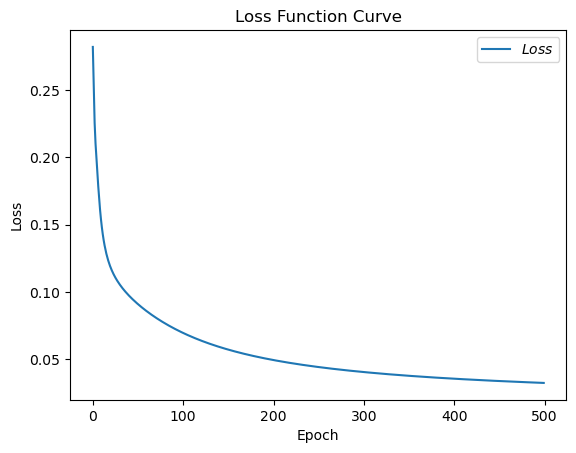

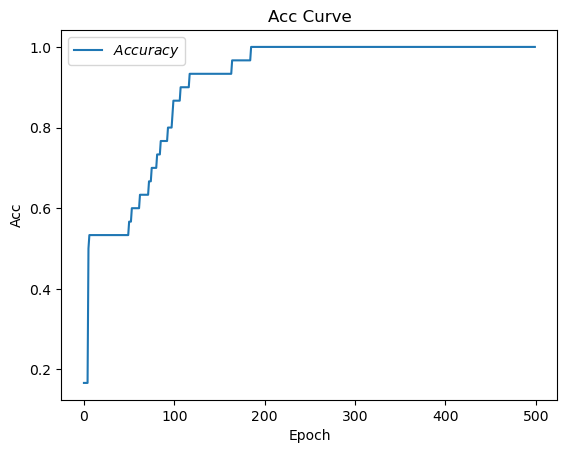

In [55]:
# 鸢尾花的分类 属性4类 标签4种
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 保证输入特征和标签一一对应
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
# 前120行为训练数据集 后30行为测试数据集
x_train = x_data[:-30]
y_train = y_data[:-30]

x_test = x_data[-30:]
y_test = y_data[-30:]


x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# 数据集分批次 每个批次为32
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 初始化权重 使用seed每次结果一致 输出也一致
w1 = tf.Variable(tf.random.truncated_normal([4,3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))


lr = 0.1
train_loss_results = []
test_acc = []
epoch = 500 
loss_all = 0

for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train, w1) + b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        
        grads = tape.gradient(loss, [w1,b1])

        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])
    
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)
    loss_all = 0


    total_correct, total_number = 0,0
    for x_test,y_test in test_db:
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis = 1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype = tf.int32)
        print(f'correct is\n',correct)
        correct = tf.reduce_sum(correct)
        total_correct = int(correct)
        total_number = x_test.shape[0]
        print(f'total_correct is {total_correct},total_number is { total_number}\n')
        acc = total_correct / total_number
        test_acc.append(acc)
        print("Test_acc:", acc)
        print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()


